In [31]:
# Notebook Header & Conclusion

notebook_intro = """
# Final Project: Real-Time Flood Alert System
**Theme:** Water Resource Management
**Student:** [Mungara Gangothri Devi]

This notebook combines dataset analysis, transformation, feature selection, model building, and flood alert logic into one final submission.
"""


print(notebook_intro)



# Final Project: Real-Time Flood Alert System
**Theme:** Water Resource Management  
**Student:** [Mungara Gangothri Devi]  

This notebook combines dataset analysis, transformation, feature selection, model building, and flood alert logic into one final submission.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 200)

In [ ]:
from google.colab import files
uploaded = files.upload()   # choose your CSV (e.g. flood_inter(1)(1).csv)

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Loaded:", filename, "| Shape:", df.shape)
df.head()

Saving flood_inter (1) (1).csv to flood_inter (1) (1).csv
Loaded: flood_inter (1) (1).csv | Shape: (50000, 21)


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
print("Columns:", df.columns.tolist())
print("Shape:", df.shape)

Columns: ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']
Shape: (50000, 21)


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulne

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,50000.0,4.99148,2.236834,0.000,3.000,5.0,6.000,16.000
TopographyDrainage,50000.0,4.98410,2.246488,0.000,3.000,5.0,6.000,18.000
RiverManagement,50000.0,5.01594,2.231310,0.000,3.000,5.0,6.000,16.000
Deforestation,50000.0,5.00848,2.222743,0.000,3.000,5.0,6.000,17.000
Urbanization,50000.0,4.98906,2.243159,0.000,3.000,5.0,6.000,17.000
ClimateChange,50000.0,4.98834,2.226761,0.000,3.000,5.0,6.000,17.000
DamsQuality,50000.0,5.01536,2.245000,0.000,3.000,5.0,6.000,16.000
Siltation,50000.0,4.98860,2.232642,0.000,3.000,5.0,6.000,16.000
AgriculturalPractices,50000.0,5.00612,2.234588,0.000,3.000,5.0,6.000,16.000
Encroachments,50000.0,5.00638,2.241633,0.000,3.000,5.0,6.000,18.000


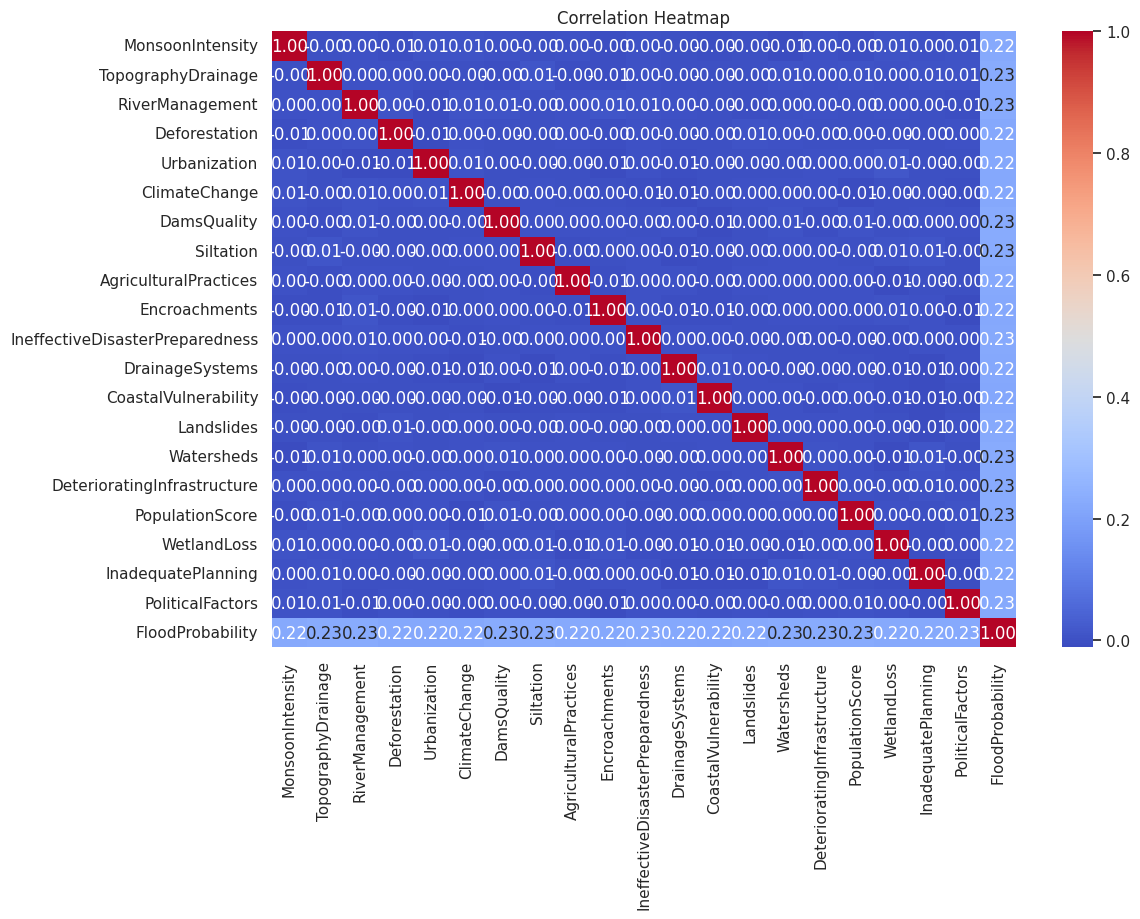

In [ ]:
# EDA basic
print("Info:")
df.info()
print("\nMissing values:\n", df.isnull().sum())
print("\nStatistics:")
display(df.describe().T)

# Correlation heatmap (numeric cols)
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Fill missing values: numeric → median, categorical → mode
for col in df.columns:
    if df[col].dtype in ['int64','float64','float32','int32']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode().iloc[0] if not df[col].mode().empty else "Unknown", inplace=True)

print("Total missing values after fill:", df.isnull().sum().sum())

Total missing values after fill: 0


/tmp/ipython-input-3046131297.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [19]:
# Ensure TARGET_COL is set
TARGET_COL = "FloodProbability"
print("Using target:", TARGET_COL)

# Convert continuous FloodProbability to classification 0/1
y = (df[TARGET_COL] >= 0.5).astype(int)
print("Class counts:\n", y.value_counts())

# Features
X = df.drop(columns=[TARGET_COL])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("X shape:", X_scaled.shape, "y shape:", y.shape)

Using target: FloodProbability
Class counts:
 FloodProbability
1    25513
0    24487
Name: count, dtype: int64
X shape: (50000, 20) y shape: (50000,)


In [20]:
selector = SelectKBest(f_regression, k=min(10, X_scaled.shape[1]))
selector.fit(X_scaled.fillna(0), y)

scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
print("SelectKBest scores:\n", scores)

top_features = scores.head(8).index.tolist()
print("\nTop features:", top_features)

SelectKBest scores:
 Watersheds                         1836.177031
IneffectiveDisasterPreparedness    1795.289500
TopographyDrainage                 1769.682845
Siltation                          1753.449022
DeterioratingInfrastructure        1723.232169
DamsQuality                        1700.967141
PopulationScore                    1680.084443
MonsoonIntensity                   1647.078537
RiverManagement                    1646.603347
PoliticalFactors                   1640.720605
InadequatePlanning                 1630.708142
ClimateChange                      1629.355050
Deforestation                      1624.588342
AgriculturalPractices              1606.593733
WetlandLoss                        1586.440302
Urbanization                       1558.863924
Landslides                         1556.371434
Encroachments                      1542.328133
DrainageSystems                    1528.041010
CoastalVulnerability               1504.351454
dtype: float64

Top features: ['Watersh

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X[top_features], y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("LR Accuracy:", accuracy_score(y_test, y_pred_lr))
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))

LR Accuracy: 0.7248
RF Accuracy: 0.7024


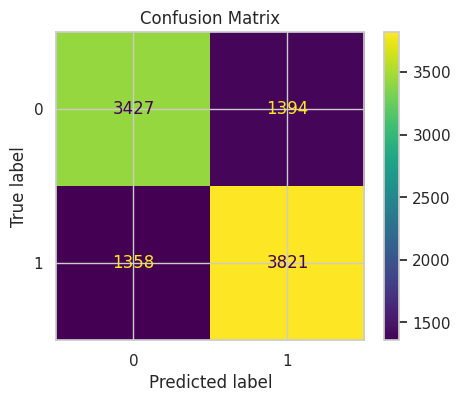

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      4821
           1       0.73      0.74      0.74      5179

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [22]:
best_model = rf if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_lr) else lr

cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, best_model.predict(X_test)))

In [27]:
def flood_alert(input_data):
    # input_data: array-like of the full X.columns order values
    input_df = pd.DataFrame([input_data], columns=X.columns)  # keep column names
    input_scaled = scaler.transform(input_df)
    input_scaled_df = pd.DataFrame(input_scaled, columns=X.columns)
    pred = best_model.predict(input_scaled_df[top_features])[0]
    return "⚠️ Flood Alert" if pred == 1 else "✅ Safe"

In [28]:
# Use the flood_alert function on the first row of X
example = X.iloc[0].values
print("Prediction for first row:", flood_alert(example))

Prediction for first row: ✅ Safe


In [30]:
conclusion = """
## Conclusion
- Performed EDA, feature selection, and model training.
- Converted FloodProbability to classification (0/1) for alert system.
- Compared Logistic Regression and Random Forest; selected best model.
- Implemented `flood_alert()` function for quick alerts.
- Future work: integrate real-time API & SMS alerts, deploy model as API/Streamlit.
"""
print(conclusion)


## Conclusion
- Performed EDA, feature selection, and model training.
- Converted FloodProbability to classification (0/1) for alert system.
- Compared Logistic Regression and Random Forest; selected best model.
- Implemented `flood_alert()` function for quick alerts.
- Future work: integrate real-time API & SMS alerts, deploy model as API/Streamlit.

